In [53]:
import os
import xarray as xr
import pandas as pd
import numpy as np
import sys

In [54]:
exp = 'lcic'

In [55]:

#outputdir = f'/perm/nk0j/ecearth3-cmip6/runtime/classic/fwf/interactive/forcing_files/{exp}'
outputdir = f'/perm/nlcd/eve-classic/fwf/interactive/forcing_files/{exp}'
freshwater_forcing_file = f'{outputdir}/TotalFreshwaterForcing_{exp}_1850_2100.csv'
basal_melt_anomaly_file = f'{outputdir}/BasalMeltAnomaly_{exp}_1850_2100.csv'
freshwater_forcing_anomaly_file = f'{outputdir}/FreshwaterForcingAnomaly_{exp}_1850_2100.csv'
cumulative_freshwater_forcing_anomaly_file = f'{outputdir}/CumulativeFreshwaterForcingAnomaly_{exp}_Future.csv'  
thetao_file = f'{outputdir}/OceanSectorThetao_{exp}_1850_2100.csv'
thetao_30yRM_file = f'{outputdir}/OceanSectorThetao_30yRM_{exp}_1850_2100.csv'
print(freshwater_forcing_file)


/perm/nlcd/eve-classic/fwf/interactive/forcing_files/lcic/TotalFreshwaterForcing_lcic_1850_2100.csv


In [56]:
df_fwf = pd.read_csv(freshwater_forcing_file)
df_thetao = pd.read_csv(thetao_file)
df_thetao_30yRM = pd.read_csv(thetao_30yRM_file)
df_bm_anom = pd.read_csv(basal_melt_anomaly_file)
df_fwf_anom = pd.read_csv(freshwater_forcing_anomaly_file)
df_cum_fwf_anom = pd.read_csv(cumulative_freshwater_forcing_anomaly_file)

In [57]:
df_fwf = df_fwf.set_index('year')
df_fwf = df_fwf.rename(columns={'0':'fwf'})
df_fwf_anom = df_fwf -df_fwf.loc[1850] #only show anomalous forcing
df_fwf

,fwf
year,
1850,3726.000000
1851,3868.573850
1852,3902.092436
1853,3896.130714
1854,3874.146010
...,...
2094,6318.340527
2095,6289.686689
2096,6298.779333


<AxesSubplot:xlabel='year', ylabel='Sum of freshwater fluxes (Gt/yr)'>

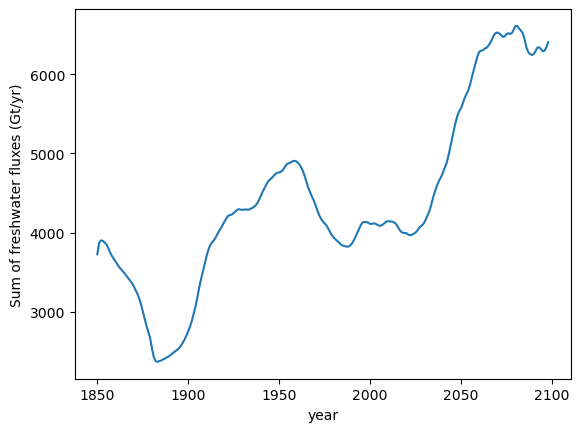

In [58]:
df_fwf.plot.line(ylabel='Sum of freshwater fluxes (Gt/yr)', legend=None)

<AxesSubplot:xlabel='year', ylabel='Sum of freshwater flux anomalies (Gt/yr)'>

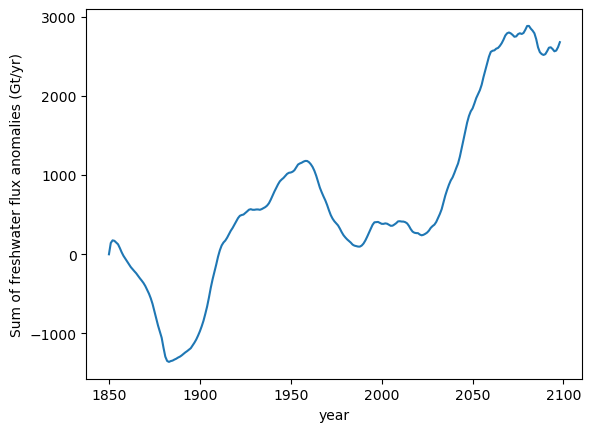

In [59]:
df_fwf_anom.plot.line(ylabel='Sum of freshwater flux anomalies (Gt/yr)', legend=None)

<AxesSubplot:xlabel='year', ylabel='Ocean temperature [degC]'>

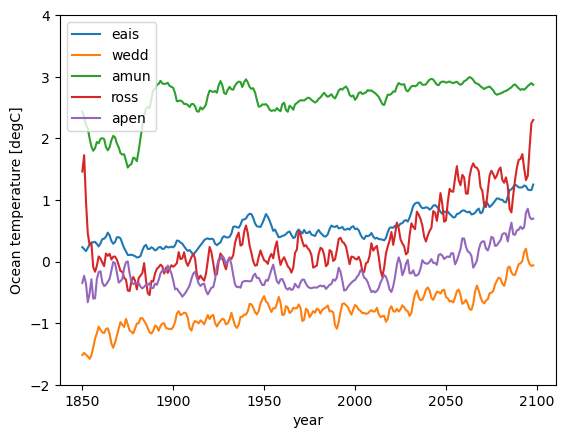

In [60]:
df_thetao.plot.line(x='year',y=['eais','wedd','amun','ross','apen'],ylabel='Ocean temperature [degC]',ylim=[-2,4])

In [61]:
df_thetao=df_thetao.set_index('year')
df_thetao_ssp=df_thetao.loc[2015:2100]
df_thetao_ssp

,eais,wedd,amun,ross,apen
year,,,,,
2015,0.355763,-0.889533,2.555509,-0.249873,-0.282634
2016,0.343247,-0.880037,2.539705,-0.099078,-0.218640
2017,0.383116,-0.978311,2.628703,0.131345,-0.245930
2018,0.477888,-0.931569,2.709330,0.245347,-0.335979
2019,0.545997,-0.771583,2.705059,0.341954,-0.453505
...,...,...,...,...,...
2094,1.221859,0.207817,2.815135,1.322250,0.790112
2095,1.169300,0.042080,2.848966,1.390953,0.857359
2096,1.158990,-0.041427,2.873174,1.846307,0.728443


<AxesSubplot:xlabel='year', ylabel='Ocean temperature [degC]'>

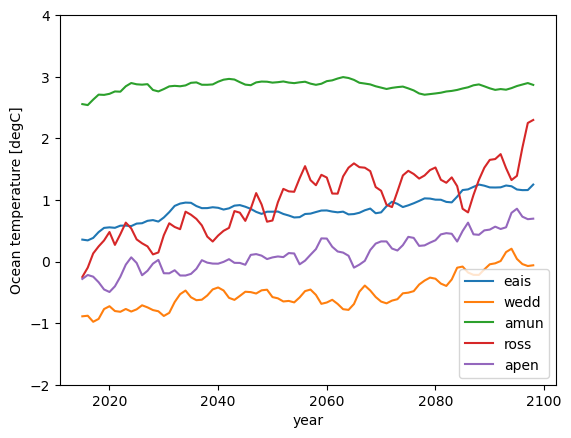

In [62]:
df_thetao_ssp.plot.line(y=['eais','wedd','amun','ross','apen'],ylabel='Ocean temperature [degC]',ylim=[-2,4])

In [63]:
df_thetao_ssp.loc[2080:2100].mean(axis=0)

eais    1.148182
wedd   -0.109747
amun    2.815345
ross    1.472788
apen    0.550284
dtype: float64

In [64]:
df_thetao_ssp.loc[2080:2100].mean(axis=0)-df_thetao_ssp.loc[2015:2035].mean(axis=0)

eais    0.508353
wedd    0.659912
amun    0.034661
ross    1.110984
apen    0.752540
dtype: float64

<AxesSubplot:xlabel='year', ylabel='Ocean temperature - 30yr running mean [degC]'>

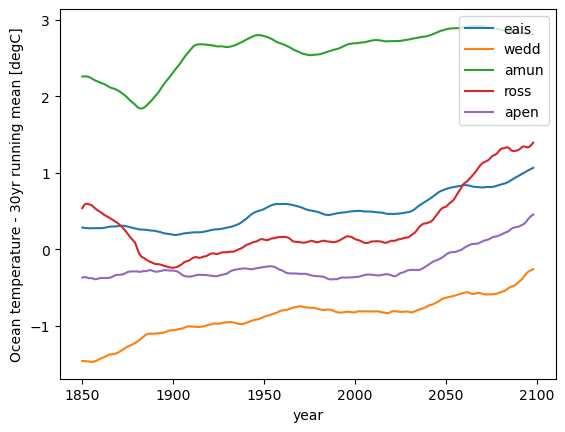

In [65]:
df_thetao_30yRM.plot.line(x='year',y=['eais','wedd','amun','ross','apen'],ylabel='Ocean temperature - 30yr running mean [degC]')

In [66]:
# Temperature increase last 100 yr
df_thetao.iloc[-31:-1].mean()-df_thetao.iloc[-131:-101].mean()

eais    0.557844
wedd    0.545405
amun    0.124513
ross    1.198430
apen    0.805041
dtype: float64

In [67]:
df_thetao.iloc[-31:-1]

,eais,wedd,amun,ross,apen
year,,,,,
2068,0.859635,-0.470453,2.875335,1.466996,0.186612
2069,0.783800,-0.576087,2.844918,1.208852,0.291112
2070,0.797988,-0.650517,2.823137,1.148478,0.326650
2071,0.898988,-0.678902,2.801012,0.920278,0.325991
2072,0.970338,-0.634470,2.819305,0.884171,0.210698
2073,0.936045,-0.611473,2.831275,1.136618,0.178937
2074,0.884428,-0.515888,2.839960,1.397737,0.265531
2075,0.912056,-0.505762,2.810678,1.472504,0.400316
2076,0.945662,-0.480986,2.777720,1.420702,0.383460


In [68]:
# Temperature increase last 100 yr
#df_thetao_30yRM.iloc[-1]-df_thetao_30yRM.iloc[-101]


<AxesSubplot:xlabel='year', ylabel='Basal melt anomaly [m/yr]'>

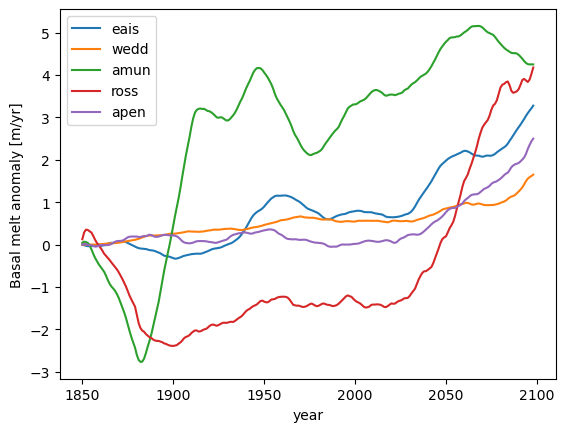

In [69]:
df_bm_anom.plot.line(x='year',y=['eais','wedd','amun','ross','apen'],ylabel='Basal melt anomaly [m/yr]')

In [70]:
df_fwf_anom

,fwf
year,
1850,0.000000
1851,142.573850
1852,176.092436
1853,170.130714
1854,148.146010
...,...
2094,2592.340527
2095,2563.686689
2096,2572.779333


<AxesSubplot:xlabel='year', ylabel='Freshwater forcing anomaly [Gt/yr]'>

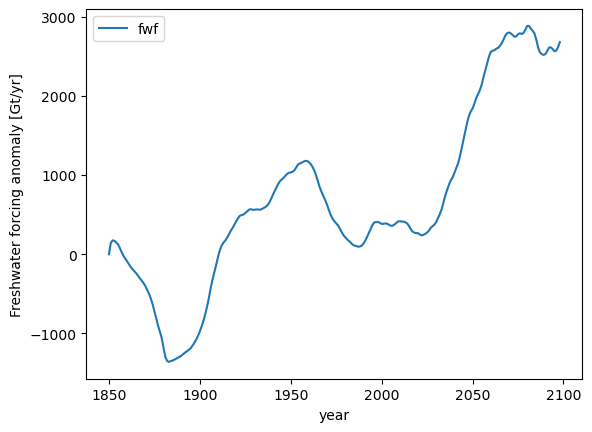

In [71]:
df_fwf_anom.plot.line(y=['fwf'],ylabel='Freshwater forcing anomaly [Gt/yr]')

<AxesSubplot:xlabel='year', ylabel='Cumulative freshwater forcing anomaly [Gt/yr]'>

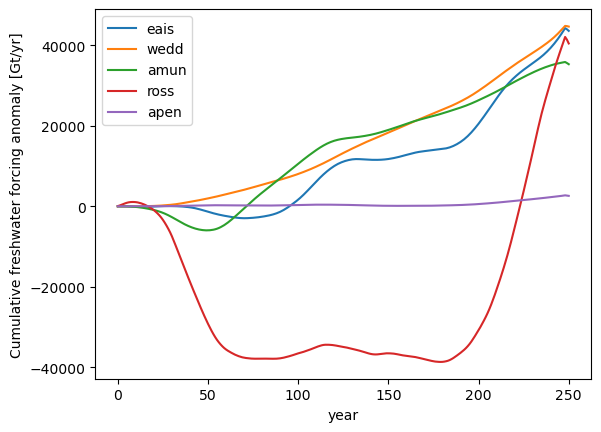

In [72]:
df_cum_fwf_anom = df_cum_fwf_anom.rename(columns={'Unnamed: 0': 'year'})
df_cum_fwf_anom.plot.line(x='year',y=['eais','wedd','amun','ross','apen'],ylabel='Cumulative freshwater forcing anomaly [Gt/yr]')


In [73]:
Sv_per_Gtpy       = 3.17e-5

In [74]:
df_fwf_Sv = df_fwf.rename(columns={'0': 'fwf'})
df_fwf_Sv['fwf']=df_fwf_Sv['fwf']*Sv_per_Gtpy


In [75]:
df_fwf_Sv

,fwf
year,
1850,0.118114
1851,0.122634
1852,0.123696
1853,0.123507
1854,0.122810
...,...
2094,0.200291
2095,0.199383
2096,0.199671


<AxesSubplot:xlabel='year', ylabel='Total freshwater forcing [Sv]'>

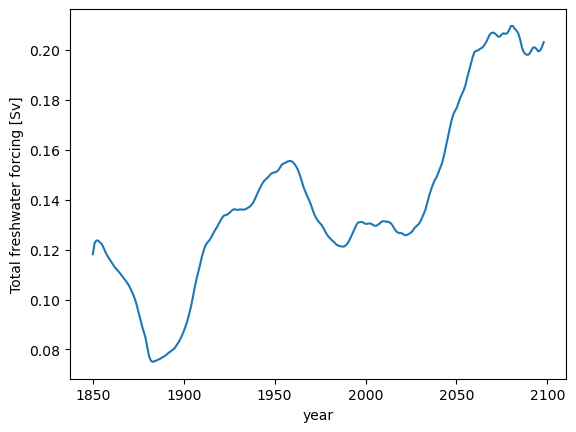

In [76]:
df_fwf_Sv.plot.line(y=['fwf'],ylabel='Total freshwater forcing [Sv]', legend=None)